# Laboratory Work 4

---

### **Topic**: 
#### 🖥️ *DataFrames Merging, Data Aggregation and Data Visualization*

---

### **Goal**:
#### 🎯 *Learning Pandas methods for data merging and aggregation*

---

### **Progress of work**:

#### 1. Load the energy data from the file “En_In.xls”, which is a list of indicators of energy supply and renewable electricity production, and put into a DataFrame

In [1]:
import pandas as pd

df_energy = pd.read_excel("En_In.xls", engine='xlrd', header=17, skipfooter=38)
df_energy = df_energy.iloc[:, 2:]
df_energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

df_energy.head()

Country Energy Supply Energy Supply per Capita  % Renewable
0     Afghanistan           321                       10    78.669280
1         Albania           102                       35   100.000000
2         Algeria          1959                       51     0.551010
3  American Samoa           ...                      ...     0.641026
4         Andorra             9                      121    88.695650

#### 2. Convert „Energy Supply’ to gigajoules (Note: there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values

In [6]:
import numpy as np

df_energy['Energy Supply'].replace("...", np.nan, inplace=True)
df_energy['Energy Supply per Capita'].replace("...", np.nan, inplace=True)
df_energy['Energy Supply'] = df_energy['Energy Supply'] * 1_000_000

df_energy.head()

Country  Energy Supply  Energy Supply per Capita  % Renewable
0     Afghanistan   3.210000e+20                      10.0    78.669280
1         Albania   1.020000e+20                      35.0   100.000000
2         Algeria   1.959000e+21                      51.0     0.551010
3  American Samoa            NaN                       NaN     0.641026
4         Andorra   9.000000e+18                     121.0    88.695650

#### 3. There are several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g. 'Bolivia (Plurinational State of)' should be „Bolivia‟, „Switzerland17‟ should be Switzerland‟.

In [4]:
import re

def clean_country_name(name):
    name = re.sub(r"\s*\(.*\)\s*", "", name)
    name = re.sub(r"\d+", "", name)

    return name.strip()

df_energy['Country'] = df_energy['Country'].apply(clean_country_name)

df_energy.head(30)

Country  Energy Supply Energy Supply per Capita  \
0                        Afghanistan   3.210000e+14                       10   
1                            Albania   1.020000e+14                       35   
2                            Algeria   1.959000e+15                       51   
3                     American Samoa            NaN                      ...   
4                            Andorra   9.000000e+12                      121   
5                             Angola   6.420000e+14                       27   
6                           Anguilla   2.000000e+12                      136   
7                Antigua and Barbuda   8.000000e+12                       84   
8                          Argentina   3.378000e+15                       79   
9                            Armenia   1.430000e+14                       48   
10                             Aruba   1.200000e+13                      120   
11                         Australia   5.386000e+15                      231   
12                           Austria   1.391000e+15                      164   
13                        Azerbaijan   5.670000e+14                       60   
14                           Bahamas   4.500000e+13                      118   
15                           Bahrain   5.740000e+14                      425   
16                        Bangladesh   1.625000e+15                       10   
17                          Barbados   1.900000e+13                       69   
18                           Belarus   1.142000e+15                      120   
19                           Belgium   2.338000e+15                      210   
20                            Belize   1.300000e+13                       39   
21                             Benin   1.700000e+14                       16   
22                           Bermuda   6.000000e+12                       88   
23                            Bhutan   6.300000e+13                       83   
24                           Bolivia   3.360000e+14                       32   
25  Bonaire, Sint Eustatius and Saba   5.000000e+12                      213   
26            Bosnia and Herzegovina   2.660000e+14                       70   
27                          Botswana   8.600000e+13                       39   
28                            Brazil   1.214900e+16                       59   
29            British Virgin Islands   2.000000e+12                       85   

    % Renewable  
0     78.669280  
1    100.000000  
2      0.551010  
3      0.641026  
4     88.695650  
5     70.909090  
6      0.000000  
7      0.000000  
8     24.064520  
9     28.236060  
10    14.870690  
11    11.810810  
12    72.452820  
13     6.384345  
14     0.000000  
15     0.000000  
16     1.966329  
17     0.000000  
18     0.463389  
19     9.959739  
20    64.690030  
21     0.000000  
22     0.000000  
23   100.000000  
24    31.477120  
25     0.000000  
26    41.464670  
27     0.131406  
28    69.648030  
29     0.000000

#### 4. Rename the following list of countries: "Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"

In [7]:
country_replacements = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

df_energy['Country'] = df_energy['Country'].replace(country_replacements)

df_energy.loc[df_energy['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

Country  Energy Supply  Energy Supply per Capita  % Renewable
3    American Samoa            NaN                       NaN     0.641026
24          Bolivia   3.360000e+20                      32.0    31.477120
164     South Korea   1.100700e+22                     221.0     2.279353

#### 5. Next, load the GDP data from the file “gpd.csv”, which is a csv containing countries‟ GDP from 1960 to 2015 from World Bank. Make sure to skip the header, and rename the following list of countries: "Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"

In [17]:
gdp_data = pd.read_csv("gpd.csv", skiprows=4)

year_columns = [str(year) for year in range(1960, 2016)]
columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + year_columns
gdp_data.columns = columns

gdp_data['Country Name'] = gdp_data['Country Name'].replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
})

gdp_data.head(1)

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  GDP at market prices (constant 2010 US$)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...  2006  2007  2008  \
0  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   

   2009          2010  2011  2012  2013  2014  2015  
0   NaN  2.467704e+09   NaN   NaN   NaN   NaN   NaN  

[1 rows x 60 columns]

#### 6. Load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file “scimagojr.xlsx”, which ranks countries based on their journal contributions in the aforementioned area

In [33]:
scimago_data = pd.read_excel("scimagojr.xlsx")

#### 7. Join the three datasets from tasks 1-6 into a new dataset (using the intersection of country names)
#### - Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15)
#### - The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015']
#### You should obtain a DataFrame with 15 rows and 20 columns

In [48]:
top_15_scimago = scimago_data.sort_values(by='Rank').head(15)

gdp_last_10_years = gdp_data[['Country'] + [str(year) for year in range(2006, 2016)]]

gdp_last_10_years.rename(columns={'Country Name': 'Country'}, inplace=True)

merged_df = pd.merge(top_15_scimago, df_energy, on='Country', how='inner')
merged_df = pd.merge(merged_df, gdp_last_10_years, on='Country', how='inner')

merged_df.set_index('Country', inplace=True)

print(merged_df.shape)
merged_df.head(3)

(15, 20)


Rank  Documents  Citable documents  Citations  Self-citations  \
Country                                                                        
China             1     127050             126767     597237          411683   
United States     2      96661              94747     792274          265436   
Japan             3      30504              30287     223024           61554   

               Citations per document  H index  Energy Supply  \
Country                                                         
China                            4.70      138   1.271910e+23   
United States                    8.20      230   9.083800e+22   
Japan                            7.31      134   1.898400e+22   

               Energy Supply per Capita  % Renewable          2006  \
Country                                                              
China                              93.0     19.75491  3.992331e+12   
United States                     286.0     11.57098  1.479230e+13   
Japan                             149.0     10.23282  5.496542e+12   

                       2007          2008          2009          2010  \
Country                                                                 
China          4.559041e+12  4.997775e+12  5.459247e+12  6.039659e+12   
United States  1.505540e+13  1.501149e+13  1.459484e+13  1.496437e+13   
Japan          5.617036e+12  5.558527e+12  5.251308e+12  5.498718e+12   

                       2011          2012          2013          2014  \
Country                                                                 
China          6.612490e+12  7.124978e+12  7.672448e+12  8.230121e+12   
United States  1.520402e+13  1.554216e+13  1.577367e+13  1.615662e+13   
Japan          5.473738e+12  5.569102e+12  5.644659e+12  5.642884e+12   

                       2015  
Country                      
China          8.797999e+12  
United States  1.654857e+13  
Japan          5.669563e+12

#### 8. Create a function to define what are the top 15 countries for average GDP over the last 10 years. This function should return a Series with 15 countries and their average GDP sorted in descending order

In [51]:
def top_15_average_gdp(df):
    avg_gdp = df[[str(year) for year in range(2006, 2016)]].mean(axis=1)
    avg_gdp_series = pd.Series(avg_gdp, index=df.index, name='avgGDP')
    top_15_gdp = avg_gdp_series.sort_values(ascending=False).head(15)
    
    return top_15_gdp

top_15_gdp_series = top_15_average_gdp(merged_df)
print(top_15_gdp_series)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64


#### 9. Create a function to define by how much had the GDP changed over the past 10 years for the country with the 5th largest average GDP. This function should return a tuple with the country’s name and number

In [52]:
def gdp_change_5th_largest(df, top_15_gdp_series):
    country_5th_largest = top_15_gdp_series.index[4]
    
    gdp_change = df.loc[country_5th_largest, '2015'] - df.loc[country_5th_largest, '2006']
    
    return (country_5th_largest, gdp_change)

gdp_change_result = gdp_change_5th_largest(merged_df, top_15_gdp_series)
print(gdp_change_result)

('France', 153345695364.24023)


#### 10. Create a function to define what country has the maximum % Renewable and what the percentage is. This function should return a tuple with the name of the country and the percentage

In [54]:
def max_renewable_country(df):
    max_country = df['% Renewable'].idxmax()
    max_value = df.loc[max_country, '% Renewable']
    
    return (max_country, max_value)

max_renewable_result = max_renewable_country(merged_df)
print(max_renewable_result)

('Brazil', 69.64803)


#### 11.  Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the sixth most populous country according to this estimate? This function should return a tuple with the name of the country and the population

In [55]:
def sixth_most_populous(df):
    df['Estimated Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    sorted_df = df.sort_values(by='Estimated Population', ascending=False)
    sixth_most_populous_country = sorted_df.iloc[5]

    return (sixth_most_populous_country.name, sixth_most_populous_country['Estimated Population'])

sixth_most_populous_result = sixth_most_populous(merged_df)
print(sixth_most_populous_result)

('Japan', 1.2740939597315434e+20)


#### 12. Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the .corr() method, (Pearson's correlation). This function should return a single number

In [56]:
def citable_docs_energy_corr(df):
    if 'Estimated Population' not in df.columns:
        df['Estimated Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    
    df['Citable Documents per Person'] = df['Citable documents'] / df['Estimated Population']
    correlation = df['Citable Documents per Person'].corr(df['Energy Supply per Capita'])
    
    return correlation

citable_docs_corr_result = citable_docs_energy_corr(merged_df)
print(citable_docs_corr_result)

0.7940010435442943


#### 13. Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median. This function should return a series whose index is the country name sorted in ascending order of rank

In [57]:
def renewable_above_median(df):
    median_renewable = df['% Renewable'].median()
    df['High Renewable'] = (df['% Renewable'] >= median_renewable).astype(int)
    result_series = df.sort_values(by='Rank')['High Renewable']
    
    return result_series

high_renewable_series = renewable_above_median(merged_df)
print(high_renewable_series)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: High Renewable, dtype: int64


#### 14. Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country
ContinentDict = {'China':'Asia',
 'United States':'North America',
 'Japan':'Asia',
 'United Kingdom':'Europe',
 'Russian Federation':'Europe',
 'Canada':'North America',
 'Germany':'Europe',
 'India':'Asia',
 'France':'Europe',
 'South Korea':'Asia',
 'Italy':'Europe',
 'Spain':'Europe',
 'Iran':'Asia',
 'Australia':'Australia',
 'Brazil':'South America'}

#### This function should return a DataFrame with index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and columns ['size', 'sum', 'mean', 'std']

In [60]:
def continent_population_stats(df):
    ContinentDict = {
        'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia',
        'United Kingdom': 'Europe', 'Russian Federation': 'Europe', 'Canada': 'North America',
        'Germany': 'Europe', 'India': 'Asia', 'France': 'Europe', 'South Korea': 'Asia',
        'Italy': 'Europe', 'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia',
        'Brazil': 'South America'
    }
    
    df['Continent'] = df.index.map(ContinentDict)
    continent_stats = df.groupby('Continent')['Estimated Population'].agg(['size', 'sum', 'mean', 'std'])
    
    return continent_stats

continent_population_statistics = continent_population_stats(merged_df)
continent_population_statistics

size           sum          mean           std
Continent                                                    
Asia              5  2.898666e+21  5.797333e+20  6.790979e+20
Australia         1  2.331602e+19  2.331602e+19           NaN
Europe            6  4.579297e+20  7.632161e+19  3.464767e+19
North America     2  3.528552e+20  1.764276e+20  1.996696e+20
South America     1  2.059153e+20  2.059153e+20           NaN

#### 15. Create a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2015 GDP, and the color corresponds to the continent

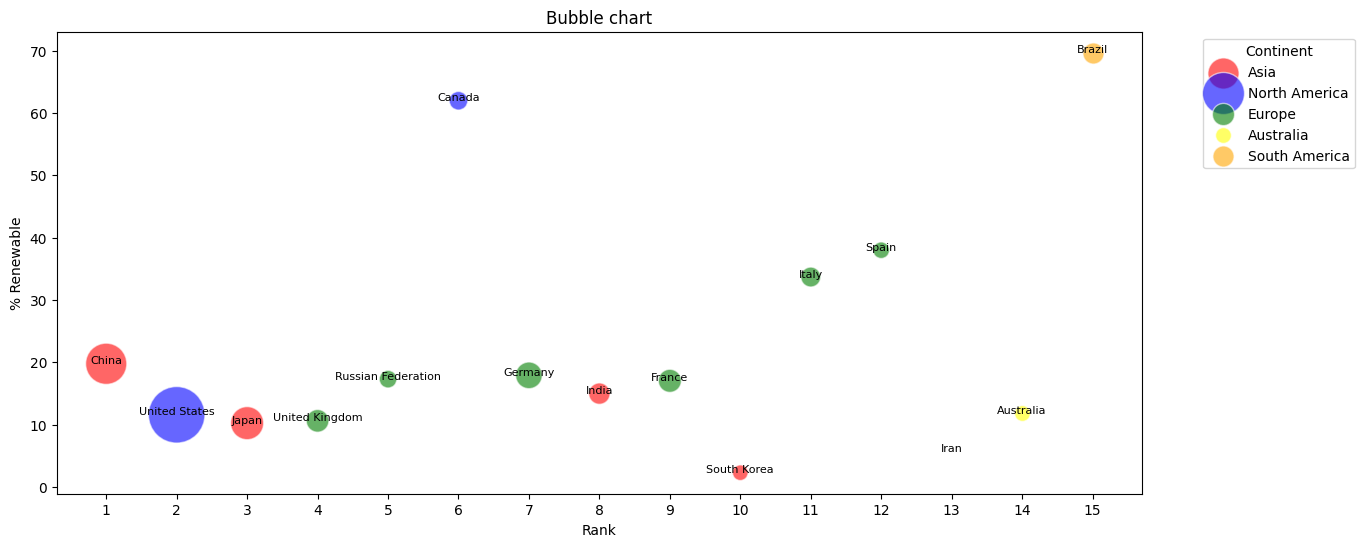

In [63]:
import matplotlib.pyplot as plt

ContinentDict = {
    'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia',
    'United Kingdom': 'Europe', 'Russian Federation': 'Europe', 'Canada': 'North America',
    'Germany': 'Europe', 'India': 'Asia', 'France': 'Europe', 'South Korea': 'Asia',
    'Italy': 'Europe', 'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia',
    'Brazil': 'South America'
}

merged_df['Continent'] = merged_df.index.map(ContinentDict)

colors = {
    'Asia': 'red', 'Europe': 'green', 'North America': 'blue',
    'Australia': 'yellow', 'South America': 'orange'
}

plt.figure(figsize=(14, 6))

for continent in merged_df['Continent'].unique():
    subset = merged_df[merged_df['Continent'] == continent]
    plt.scatter(
        subset['Rank'], subset['% Renewable'],
        s=subset['2015'] / 1e10,  # Scale GDP for better bubble sizes
        color=colors[continent], alpha=0.6, edgecolors='w', label=continent
    )

for i, row in merged_df.iterrows():
    plt.text(row['Rank'], row['% Renewable'], i, ha='center', fontsize=8)

plt.title('Bubble chart')
plt.xlabel('Rank')
plt.ylabel('% Renewable')

plt.xticks(range(1, 16))

plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

---

## 🏁 **Conclusion**

> Having completed this laboratory work, I enhanced my skills in **data merging, aggregation and visualization using Python's libraries such as pandas and matplotlib.**

---